# Problem Statement and Project Overview

This project aims to analyze stock market data for major companies, visualize trends, and understand patterns in prices over time using Python libraries.

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv('stock.csv')

df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [93]:
df = df.sort_values(by = 'Date')

df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [94]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [95]:
# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Preliminary EDA

In [96]:
df.shape

(2159, 9)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2159 entries, 2012-01-12 to 2020-08-11
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2159 non-null   float64
 1   BA      2159 non-null   float64
 2   T       2159 non-null   float64
 3   MGM     2159 non-null   float64
 4   AMZN    2159 non-null   float64
 5   IBM     2159 non-null   float64
 6   TSLA    2159 non-null   float64
 7   GOOG    2159 non-null   float64
 8   sp500   2159 non-null   float64
dtypes: float64(9)
memory usage: 168.7 KB


In [98]:
df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


In [99]:
#Let's check for null values

df.isnull().sum()

AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [100]:
# Compute 30-day moving averages for selected stocks
df['AAPL_30MA'] = df['AAPL'].rolling(window=30).mean()
print(f"The 30-day moving average for AAPL is {df['AAPL_30MA']}")

The 30-day moving average for AAPL is Date
2012-01-12           NaN
2012-01-13           NaN
2012-01-17           NaN
2012-01-18           NaN
2012-01-19           NaN
                 ...    
2020-08-05    384.319999
2020-08-06    387.504999
2020-08-07    390.158666
2020-08-10    393.401333
2020-08-11    395.925333
Name: AAPL_30MA, Length: 2159, dtype: float64


# What is the rolling() function?

The rolling() function helps you find the average (or sum, max, etc.) of values over a few days at a time, instead of all at once.

rolling() slides over your data in small chunks (like 3 days) and does math (like average) for each chunk.

It’s like looking at mini-windows of data instead of everything at once.

For instance, here for AAPL stocks, we get an average value of the stock over a period of 30 days.

In [101]:
#Let's keep a shorter window of 7 days to understand movement in weekly price for Tesla's stock

df['TSLA_30MA'] = df['TSLA'].rolling(window=7).mean()

print(f"The 30-day moving average for AAPL is {df['TSLA_30MA']}")

The 30-day moving average for AAPL is Date
2012-01-12            NaN
2012-01-13            NaN
2012-01-17            NaN
2012-01-18            NaN
2012-01-19            NaN
                 ...     
2020-08-05    1478.695714
2020-08-06    1480.565709
2020-08-07    1473.937134
2020-08-10    1464.091413
2020-08-11    1456.038557
Name: TSLA_30MA, Length: 2159, dtype: float64


In [102]:
df

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,AAPL_30MA,TSLA_30MA
Date,,,,,,,,,,,
2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000,NaN,NaN
2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966,NaN,NaN
2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044,NaN,NaN
2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039,NaN,NaN
2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020,384.319999,1478.695714
2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912,387.504999,1480.565709
2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029,390.158666,1473.937134


In [103]:
# Drop moving averages for correlation calculation
corr_matrix = df.drop(columns=['AAPL_30MA', 'TSLA_30MA']).corr()

corr_matrix

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
AAPL,1.000000,0.650275,-0.208947,0.390912,0.938721,-0.726157,0.844056,0.910145,0.892584
BA,0.650275,1.000000,-0.138619,0.746731,0.772300,-0.636949,0.333445,0.822399,0.857329
T,-0.208947,-0.138619,1.000000,0.252347,-0.243089,0.202868,-0.194363,-0.083084,-0.056531
MGM,0.390912,0.746731,0.252347,1.000000,0.468135,-0.479060,0.271630,0.653775,0.713081
AMZN,0.938721,0.772300,-0.243089,0.468135,1.000000,-0.772448,0.760451,0.957678,0.923259
IBM,-0.726157,-0.636949,0.202868,-0.479060,-0.772448,1.000000,-0.610686,-0.813388,-0.795667
TSLA,0.844056,0.333445,-0.194363,0.271630,0.760451,-0.610686,1.000000,0.735988,0.704308
GOOG,0.910145,0.822399,-0.083084,0.653775,0.957678,-0.813388,0.735988,1.000000,0.978315
sp500,0.892584,0.857329,-0.056531,0.713081,0.923259,-0.795667,0.704308,0.978315,1.000000


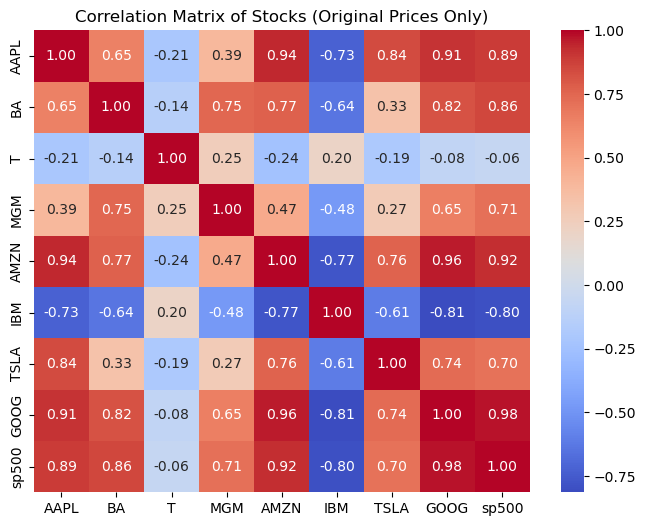

In [104]:
#We can plot this as heatmap

# Set figure size
plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix of Stocks (Original Prices Only)")
plt.show()

This heatmap shows how the prices of different stocks move in relation to each other.

Values close to 1 mean the stocks move in the same direction.

Values close to -1 mean they move in opposite directions.

Values near 0 indicate no clear relationship.

Use this to identify pairs of stocks that behave similarly — useful for diversification and portfolio design.

In [105]:
# Calculate percentage daily returns
returns = df.drop(columns = ['AAPL_30MA', 'TSLA_30MA']).pct_change()

returns

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-13,-0.003749,-0.012051,-0.001660,0.018137,0.014153,-0.007699,-0.193274,-0.007385,-0.004948
2012-01-17,0.011648,0.008579,0.005986,-0.008097,0.018159,0.004689,0.167179,0.005744,0.003553
2012-01-18,0.010384,-0.002392,0.002645,0.039184,0.042827,0.005944,0.007895,0.006889,0.011108
2012-01-19,-0.003169,0.006661,0.002967,0.005499,0.026446,-0.003038,-0.001865,0.010523,0.004939
...,...,...,...,...,...,...,...,...,...
2020-08-05,0.003625,0.055794,-0.005332,0.000000,0.021091,-0.003099,-0.001332,0.005898,0.006430
2020-08-06,0.034889,-0.011935,-0.000335,0.104067,0.006231,0.005341,0.003071,0.017976,0.006428
2020-08-07,-0.024495,-0.012660,0.006032,0.030878,-0.017842,-0.009198,-0.024752,-0.003740,0.000633


<Figure size 1200x500 with 0 Axes>

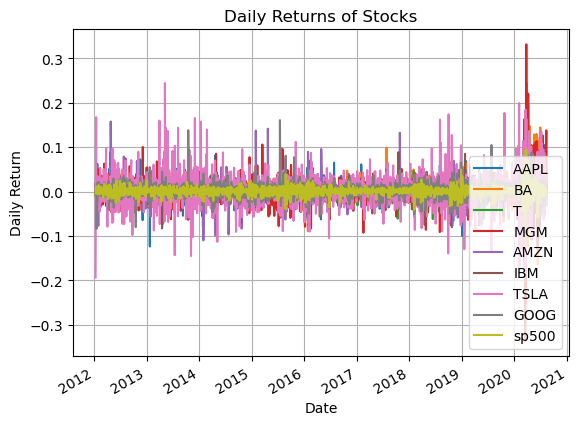

In [106]:
# Plotting daily returns
plt.figure(figsize=(12, 5))
returns.plot(title="Daily Returns of Stocks", grid=True)
plt.ylabel("Daily Return")
plt.xlabel("Date")
plt.show()

This plot shows how much each stock’s price changes day-to-day (in percentage).

It helps reveal volatility—stocks with large up/down spikes are more volatile.

You can compare which stock is more stable or risky for short-term trades.

<Figure size 1200x600 with 0 Axes>

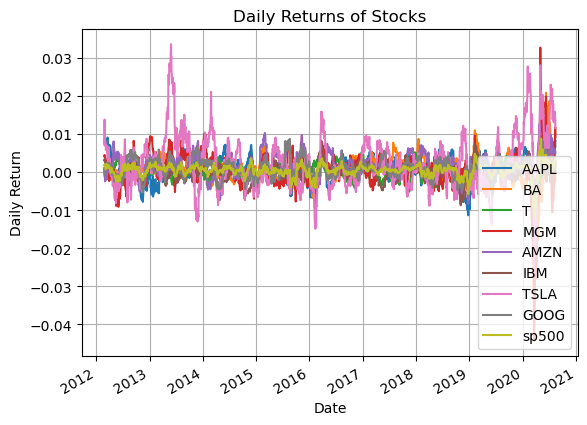

In [107]:
# Let's calculate smoothened returns

smoothed_returns = returns.rolling(window = 30).mean()


plt.figure(figsize=(12, 6))
smoothed_returns.plot(title="Daily Returns of Stocks", grid=True)
plt.ylabel("Daily Return")
plt.xlabel("Date")
plt.show()

The 30-day rolling average removes short-term noise.

Makes trends more visible, like a slow decline or consistent gain.

Useful to spot sustained movement instead of reacting to every daily change.

In [108]:
#Let's calculate 30-day moving avearge of all the stocks

df.columns

Index(['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500',
       'AAPL_30MA', 'TSLA_30MA'],
      dtype='object')

In [109]:
#Define list of stocks
stock_list = ['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500']

stock_list

['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500']

In [110]:
# Calculate 30-day moving average for each stock

for stock in stock_list:
    df[f"{stock}_MA30"] =df[stock].rolling(window = 30).mean()

In [111]:
print(df[["AAPL", "AAPL_MA30"]].head(40))

                 AAPL  AAPL_MA30
Date                            
2012-01-12  60.198570        NaN
2012-01-13  59.972858        NaN
2012-01-17  60.671429        NaN
2012-01-18  61.301430        NaN
2012-01-19  61.107143        NaN
2012-01-20  60.042858        NaN
2012-01-23  61.058571        NaN
2012-01-24  60.058571        NaN
2012-01-25  63.808571        NaN
2012-01-26  63.518570        NaN
2012-01-27  63.897144        NaN
2012-01-30  64.715714        NaN
2012-01-31  65.211426        NaN
2012-02-01  65.169998        NaN
2012-02-02  65.017143        NaN
2012-02-03  65.668571        NaN
2012-02-06  66.281425        NaN
2012-02-07  66.975716        NaN
2012-02-08  68.097145        NaN
2012-02-09  70.452858        NaN
2012-02-10  70.488571        NaN
2012-02-13  71.800003        NaN
2012-02-14  72.779999        NaN
2012-02-15  71.095711        NaN
2012-02-16  71.744286        NaN
2012-02-17  71.731430        NaN
2012-02-21  73.550003        NaN
2012-02-22  73.291428        NaN
2012-02-23

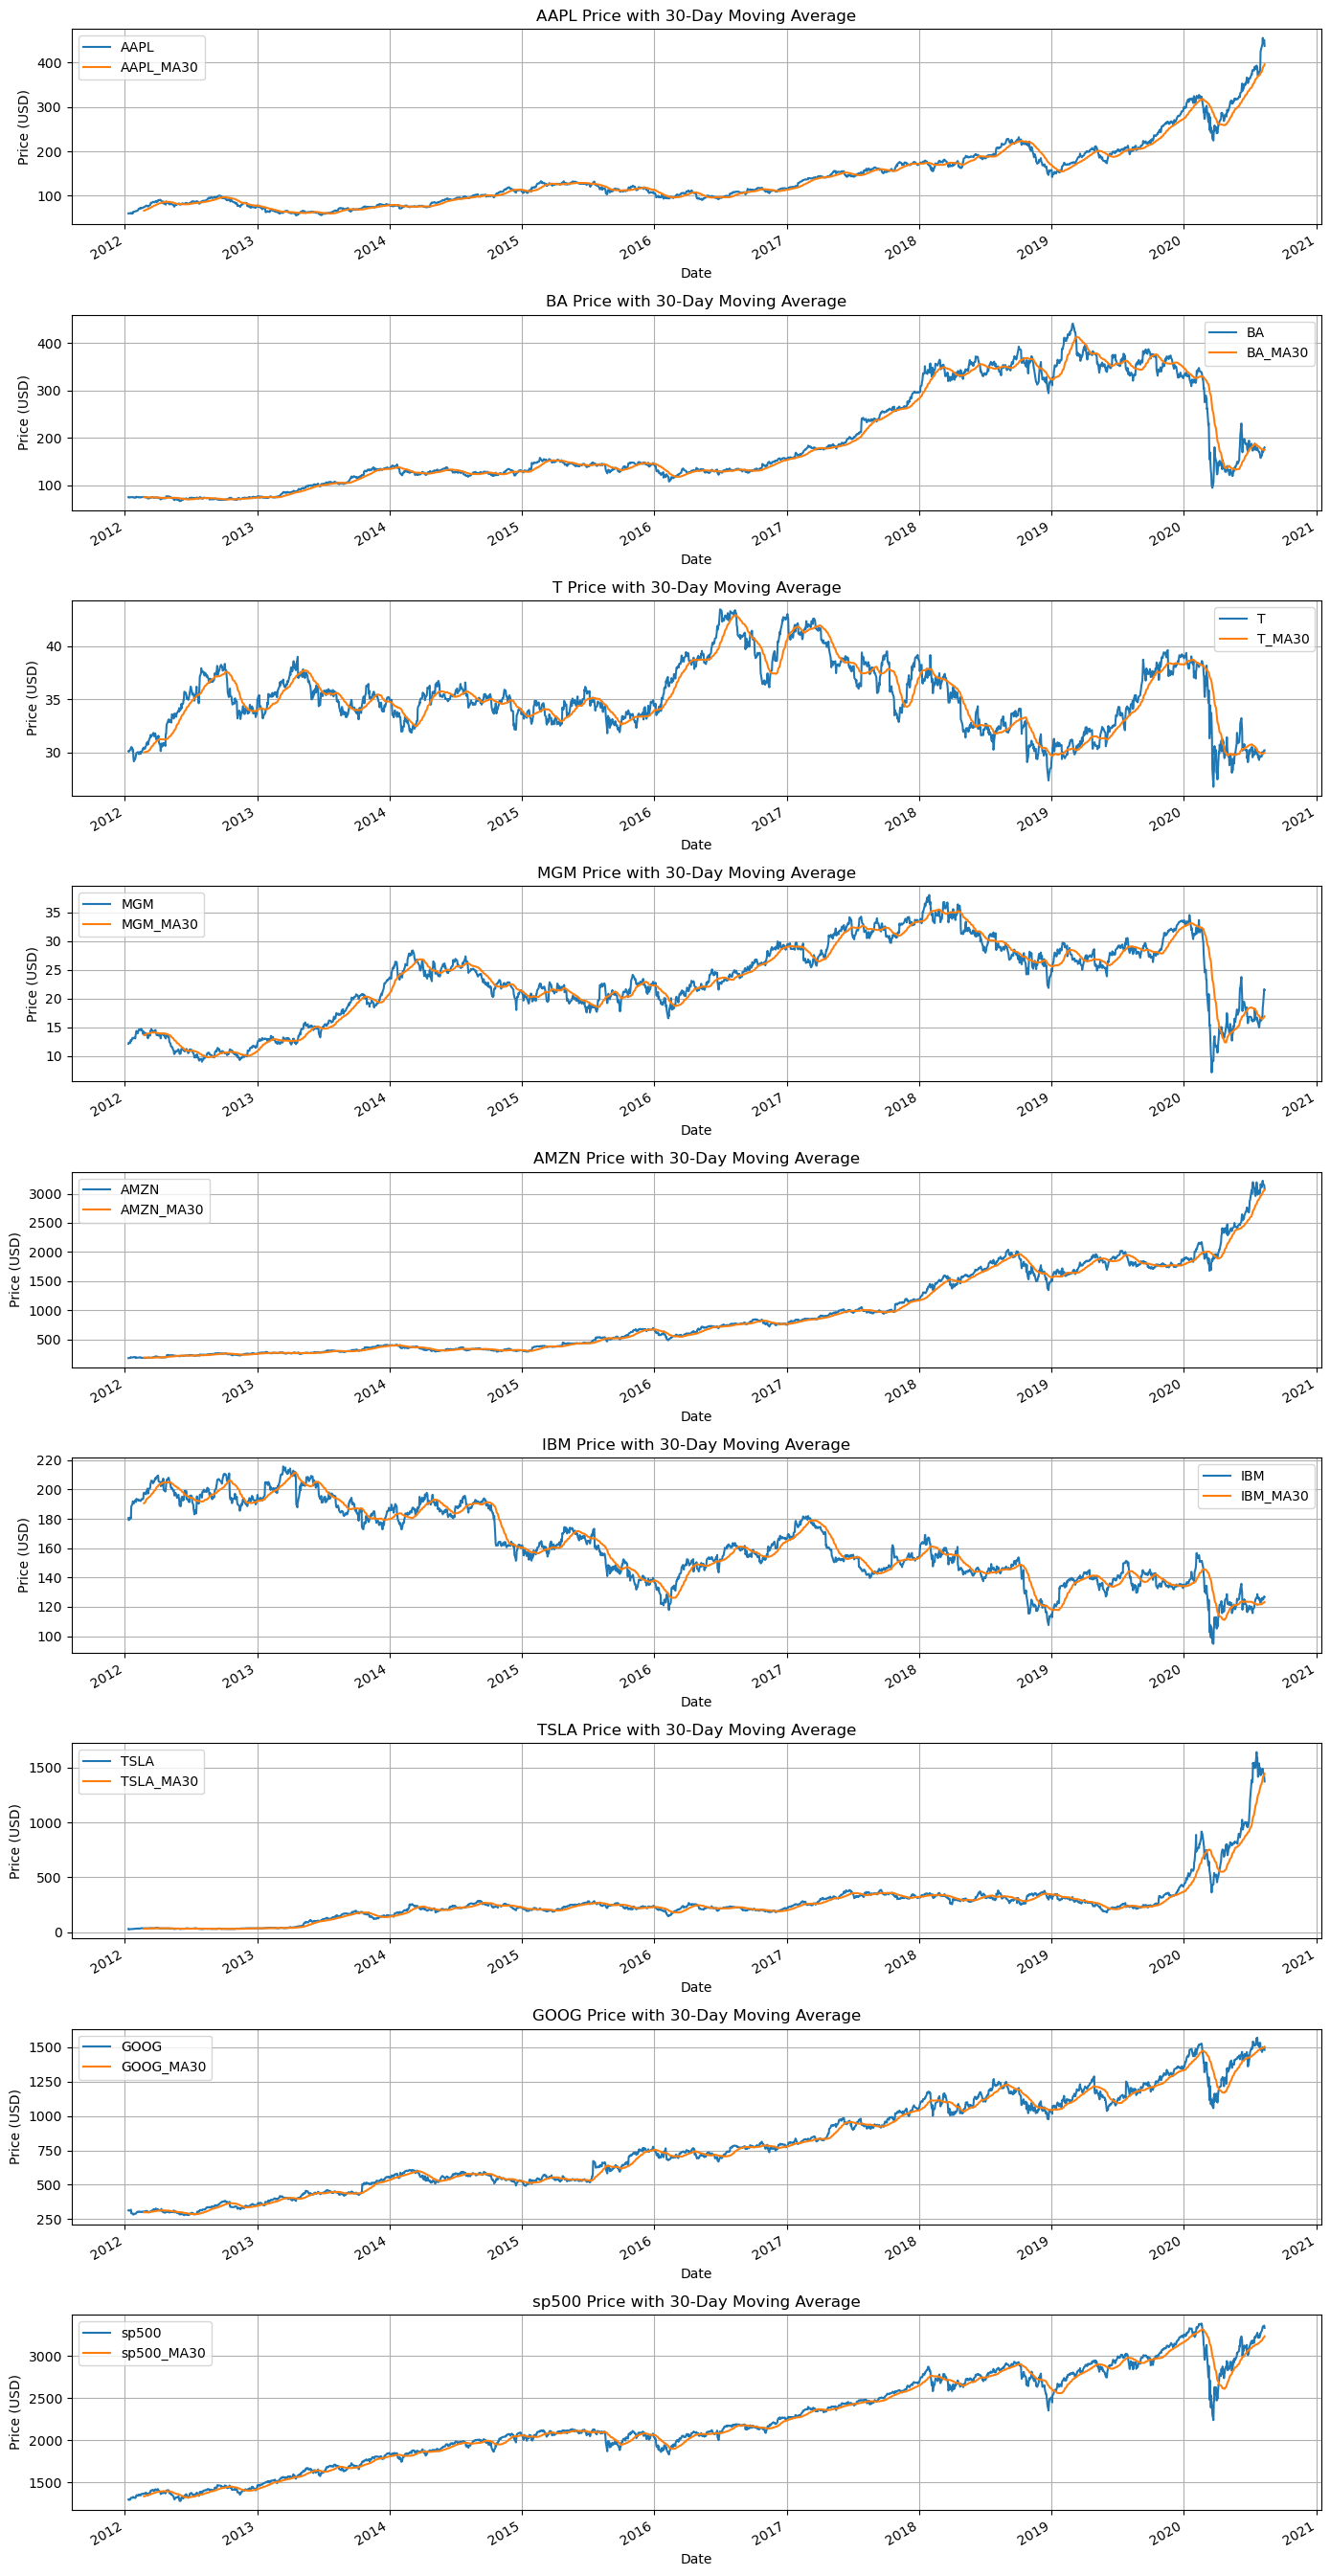

In [112]:
#Plot

num_stocks = len(stock_list)
plt.figure(figsize=(14, 3 * num_stocks))  # adjust height based on number of subplots

for i, stock in enumerate(stock_list, 1):
    plt.subplot(num_stocks, 1, i)
    df[[stock, f'{stock}_MA30']].plot(ax=plt.gca())
    plt.title(f"{stock} Price with 30-Day Moving Average")
    plt.ylabel("Price (USD)")
    plt.grid(True)

plt.tight_layout()
plt.show()

These subplots compare the actual stock price with its 30-day average.

The 30-day average smooths out volatility to show long-term trends.

When the price moves above the MA, it could signal buying strength.

When it dips below, it may signal weakness or correction.